<a href="https://colab.research.google.com/github/SANDRAJACOB1/Natural-Language-Processing/blob/main/CognoRise_Spam_Mail_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATAFRAME**

In [ ]:
df=pd.read_csv('/content/spam.csv',encoding="ISO-8859-1")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**DATA PREPROCESSING**

In [ ]:
#Printing the first five rows of the dataframe

df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Printing the last five rows of the dataframe

df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
#Printing the shape of the dataframe

df.shape

(5572, 2)

In [ ]:
#Printing the column names of the dataframe

df.columns

Index(['Category', 'Message'], dtype='object')

In [ ]:
#Printing summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
#Describing the dataframe

df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
#Printing the dataype of each column of the dataframe

df.dtypes

Category    object
Message     object
dtype: object

In [ ]:
#Checking for missing values in each column of the dataframe

df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
#Printing count of unique values in the column Category

df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

**DATA VISUALISATION**

<Axes: xlabel='Category', ylabel='count'>

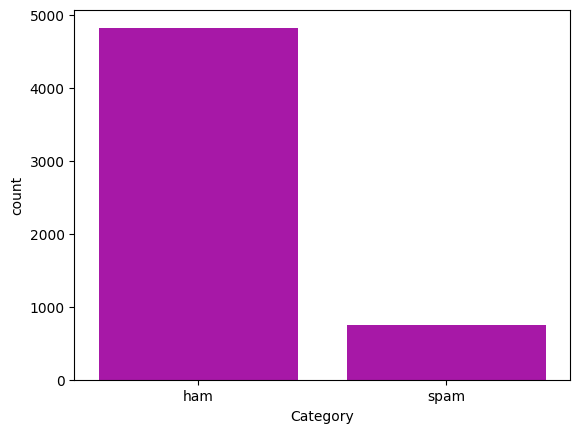

In [ ]:
sns.countplot(x='Category',data=df,color='m')

In [ ]:
#Converting the object datatype into numerical in the output column

df['Category']=df['Category'].map({'ham':1,'spam':0})
df.dtypes

Category     int64
Message     object
dtype: object

**DOWNLOADING NLTK RESOURCES**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#Assigning the datas in the column Message to a variable

tweets=df.Message
tweets

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ã¼ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Tokenization

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:tk.tokenize(x)).apply(lambda x: ' '.join(x))
tweets

0       Go until jurong point , crazy .. Available onl...
1                         Ok lar ... Joking wif u oni ...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor ... U c already then sa...
4       Nah I don't think he goes to usf , he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will Ã ¼ b going to esplanade fr home ?
5569    Pity , * was in mood for that . So ... any oth...
5570    The guy did some bitching but I acted like i'd...
5571                          Rofl . Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Removing special characters and symbols

import re
tweets=tweets.str.replace('[^a-zA-Z0-9]',' ',regex=True)
tweets

0       Go until jurong point   crazy    Available onl...
1                         Ok lar     Joking wif u oni    
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor     U c already then sa...
4       Nah I don t think he goes to usf   he lives ar...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568              Will     b going to esplanade fr home  
5569    Pity     was in mood for that   So     any oth...
5570    The guy did some bitching but I acted like i d...
5571                          Rofl   Its true to its name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Collecting meaningful words by filtering short words

from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
tweets=tweets.apply(lambda x:' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
tweets

0       until jurong point crazy Available only bugis ...
1                                      lar Joking wif oni
2       Free entry wkly comp win Cup final tkts 21st M...
3                      dun say early hor already then say
4         Nah don think goes usf lives around here though
                              ...                        
5567    This the 2nd time have tried contact have won ...
5568                            Will going esplanade home
5569         Pity was mood for that any other suggestions
5570    The guy did some bitching but acted like inter...
5571                               Rofl Its true its name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Stemming

from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))
tweets

0       until jurong point crazi avail onli bugi great...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                      dun say earli hor alreadi then say
4           nah don think goe usf live around here though
                              ...                        
5567    this the 2nd time have tri contact have won th...
5568                                will go esplanad home
5569             piti was mood for that ani other suggest
5570    the guy did some bitch but act like interest b...
5571                                 rofl it true it name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Removing stopwords

from nltk.corpus import stopwords
stop=stopwords.words('english')
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in stop]).apply(lambda x:' '.join(x))
tweets

0       jurong point crazi avail onli bugi great world...
1                                        lar joke wif oni
2       free entri wkli comp win cup final tkts 21st m...
3                           dun say earli hor alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri contact 750 pound prize claim eas...
5568                                     go esplanad home
5569                                piti mood ani suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Message, Length: 5572, dtype: object

In [ ]:
#Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
data

<5572x6886 sparse matrix of type '<class 'numpy.float64'>'
	with 44125 stored elements in Compressed Sparse Row format>

In [ ]:
print(data)

  (0, 6580)	0.20209433262298793
  (0, 996)	0.36584744940137925
  (0, 2951)	0.1715106757128994
  (0, 1756)	0.3090694036392151
  (0, 1528)	0.34924093558383135
  (0, 6748)	0.24525293802505108
  (0, 2989)	0.20172029621036136
  (0, 1530)	0.3090694036392151
  (0, 4474)	0.17504201074714854
  (0, 1180)	0.2736419609061332
  (0, 1955)	0.28332366576984663
  (0, 4767)	0.2498083732755505
  (0, 3543)	0.36584744940137925
  (1, 4472)	0.5884936620961707
  (1, 6674)	0.46469076328470776
  (1, 3512)	0.494457003144156
  (1, 3675)	0.4396020657733696
  (2, 70)	0.26961406544295236
  (2, 1067)	0.1919355645505515
  (2, 5025)	0.18542681454450735
  (2, 6321)	0.14233815390204066
  (2, 5773)	0.22578140384429926
  (2, 4982)	0.1893353125177682
  (2, 5062)	0.18542681454450735
  (2, 763)	0.25346248369348356
  :	:
  (5567, 4650)	0.23275121270305701
  (5567, 5025)	0.24602192076488918
  (5567, 4474)	0.17929202107361064
  (5568, 2471)	0.782681381846728
  (5568, 2912)	0.43953417232463426
  (5568, 3189)	0.4407034897404325
  

**SEPERATING INPUT AND OUTPUT FEATURES**

In [ ]:
y=df['Category'].values
y

array([1, 1, 0, ..., 1, 1, 1])

**SPLITTING THE DATA IN TO TRAINING AND TESTING DATAS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,y,test_size=0.30,random_state=42)
x_train

<3900x6886 sparse matrix of type '<class 'numpy.float64'>'
	with 31066 stored elements in Compressed Sparse Row format>

In [ ]:
x_test

<1672x6886 sparse matrix of type '<class 'numpy.float64'>'
	with 13059 stored elements in Compressed Sparse Row format>

In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([1, 1, 1, ..., 1, 0, 1])

**MODEL CREATION**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
linear=LogisticRegression()
forest=RandomForestClassifier(n_estimators=100,random_state=42)
ada=AdaBoostClassifier()
knn=KNeighborsClassifier()
lst=[linear,forest,ada,knn]

In [ ]:
for i in lst:
  print("Model Started")
  print(i)
  print("*"*50)
  i.fit(x_train,y_train)
  print("The Predicted values are")
  y_pred=i.predict(x_test)
  print(y_pred)
  print("Testing values are")
  print(y_test)
  print("Confusion matrics is")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score is")
  print(accuracy_score(y_test,y_pred))
  print("Performance Evaluations is")
  print(classification_report(y_test,y_pred))
  print("*"*50)

Model Started
LogisticRegression()
**************************************************
The Predicted values are
[1 1 1 ... 1 0 1]
Testing values are
[1 1 1 ... 1 0 1]
Confusion matrics is
[[ 153   71]
 [   2 1446]]
Accuracy score is
0.9563397129186603
Performance Evaluations is
              precision    recall  f1-score   support

           0       0.99      0.68      0.81       224
           1       0.95      1.00      0.98      1448

    accuracy                           0.96      1672
   macro avg       0.97      0.84      0.89      1672
weighted avg       0.96      0.96      0.95      1672

**************************************************
Model Started
RandomForestClassifier(random_state=42)
**************************************************
The Predicted values are
[1 1 1 ... 1 0 1]
Testing values are
[1 1 1 ... 1 0 1]
Confusion matrics is
[[ 186   38]
 [   0 1448]]
Accuracy score is
0.9772727272727273
Performance Evaluations is
              precision    recall  f1-score   s